In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path="C:/Users/user/Desktop/datasets/netflix_titles.csv"
df=pd.read_csv(path)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# exploring the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# getting rid of columns that i most likely won't use

In [5]:
df.drop(columns=['description','cast'],inplace=True)

In [6]:
print(df.duplicated().sum())
print(df['show_id'].duplicated().sum())
print(df['title'].duplicated().sum())

0
0
0


# so there's no duplication but there's some nan values

In [8]:
(df['director'].isna().sum()/8807)*100

29.908027705234474

In [11]:
df['director'].dropna(inplace=True)

In [13]:
df.director.isna().sum()

2634

# the nan values in country are 9% and since most movies and TVs are
# from the USA i'm gonna consider the nan are from USA

In [7]:
df['country'].fillna(value=df['country'].mode().iloc[0],inplace=True)

In [9]:
df['country'].isna().sum()

0

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [11]:
df['date_added']=df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [12]:
dirc=df['director'].value_counts()
dirc=dirc[:20].reset_index()
dirc.columns=['director','num of projects']
dirc

,director,num of projects
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


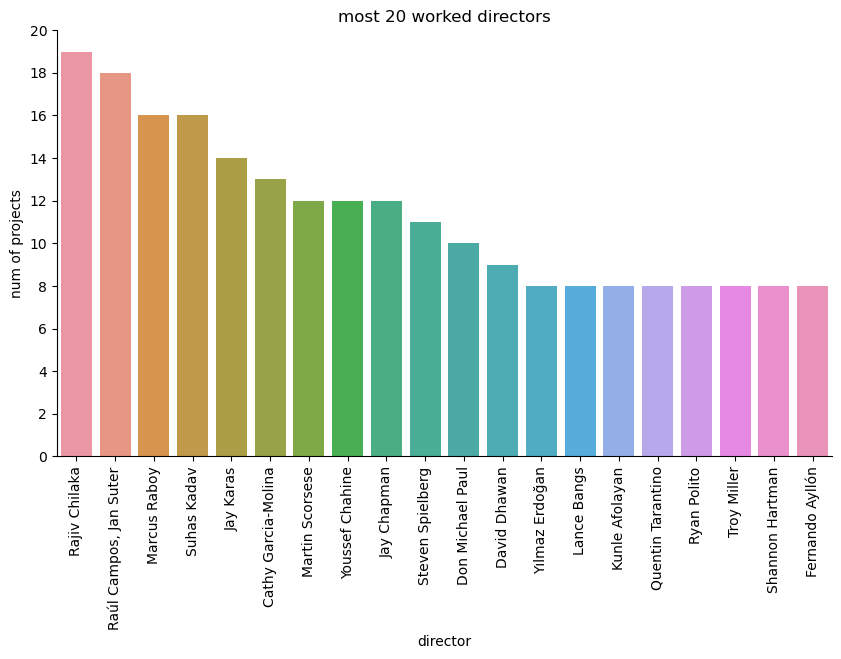

In [13]:
sns.catplot(data=dirc,x='director',y='num of projects',kind='bar',aspect=1.8).set(xlabel='director',ylabel='num of projects')
plt.title('most 20 worked directors')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,dirc.loc[0,'num of projects']+2,2))
plt.show() 

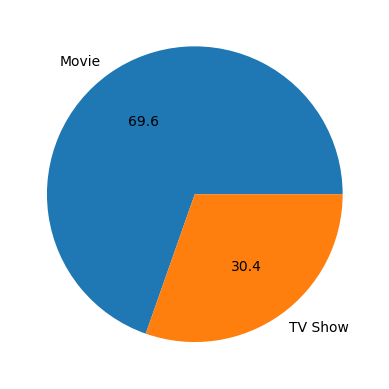

In [15]:
# the type of the shows
showtype=df['type'].value_counts()
showtype
plt.pie(showtype,labels=df['type'].unique(),autopct='%.1f')
plt.show()

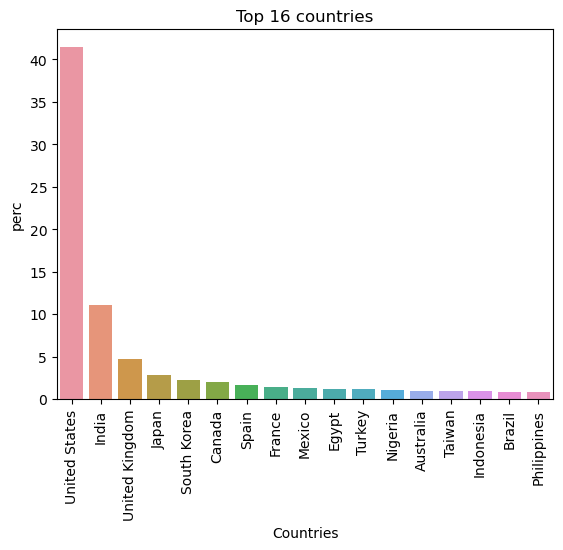

In [16]:
country = df.country.value_counts()[:17]
country
sns.barplot(x=country.index,y=country/len(df)*100)
plt.title('Top 16 countries')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('perc')
plt.show()

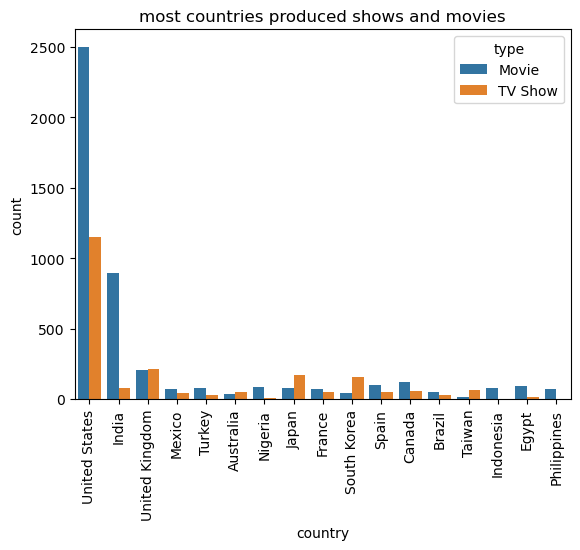

In [17]:
temp=df[df['country'].isin(country.index)]
sns.countplot(x='country',data=temp,hue='type')
plt.xticks(rotation=90)
plt.title('most countries produced shows and movies')
plt.show()


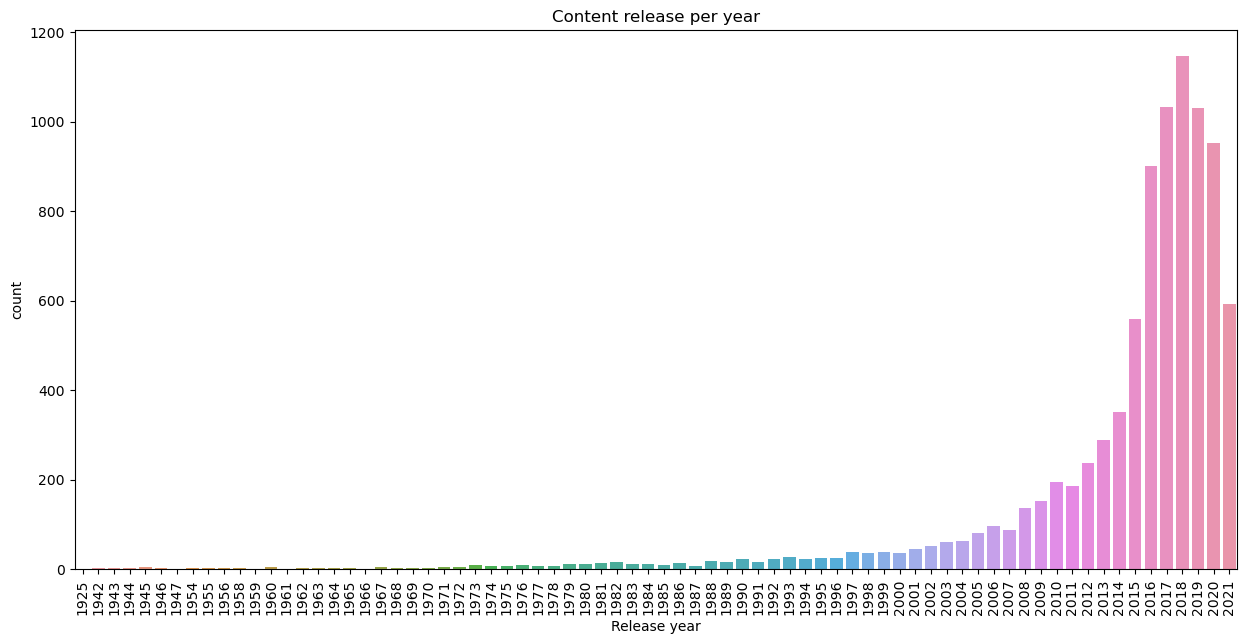

In [21]:
plt.figure(figsize = (15, 7))
sns.countplot(data=df, x='release_year')
plt.xticks(rotation=90)
plt.xlabel('Release year')
plt.title('Content release per year')
plt.show()

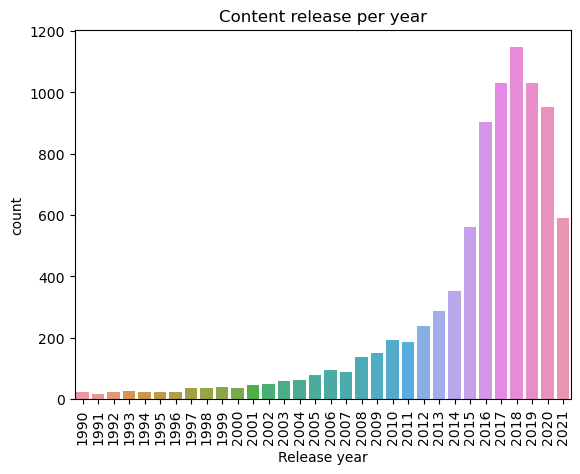

In [23]:
d=df[df['release_year']>=1990]
d
sns.countplot(data=d, x='release_year')
plt.xticks(rotation='vertical')
plt.xlabel('Release year')
plt.title('Content release per year')
plt.show()

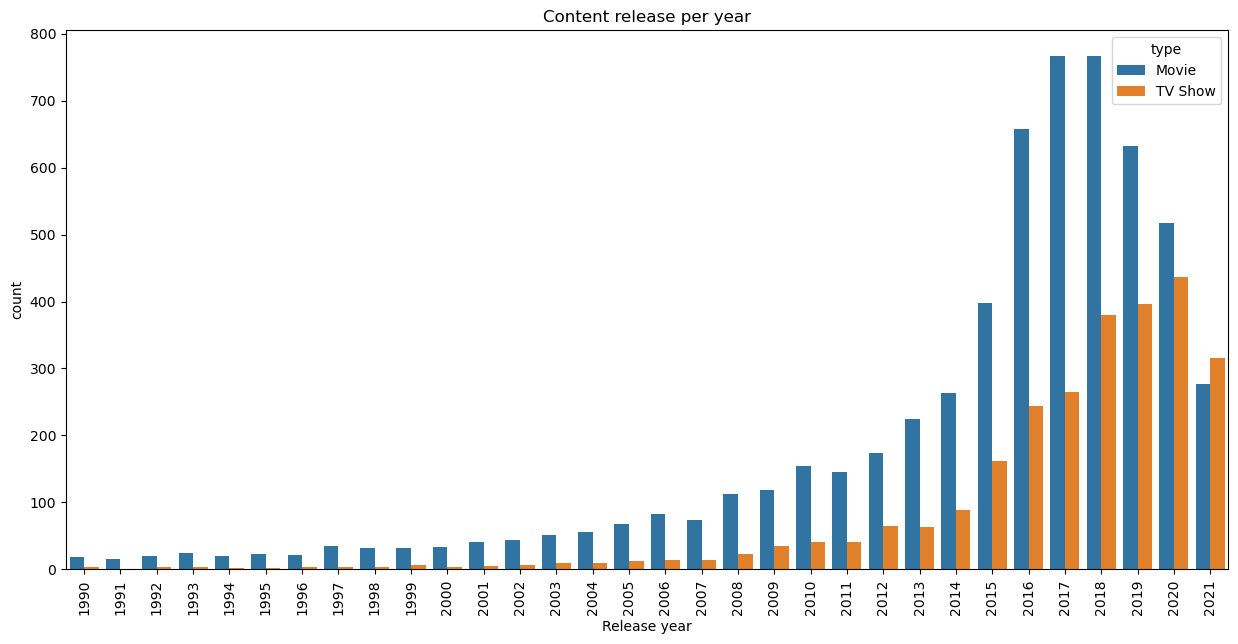

In [26]:
plt.figure(figsize = (15, 7))
sns.countplot(data=d, x='release_year',hue='type')
plt.xticks(rotation='vertical')
plt.xlabel('Release year')
plt.title('Content release per year')
plt.show()

In [29]:
df['listed_in'] = df.listed_in.str.split(', ')
g= df.listed_in.explode()
g

0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 19323, dtype: object

In [30]:
g.value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

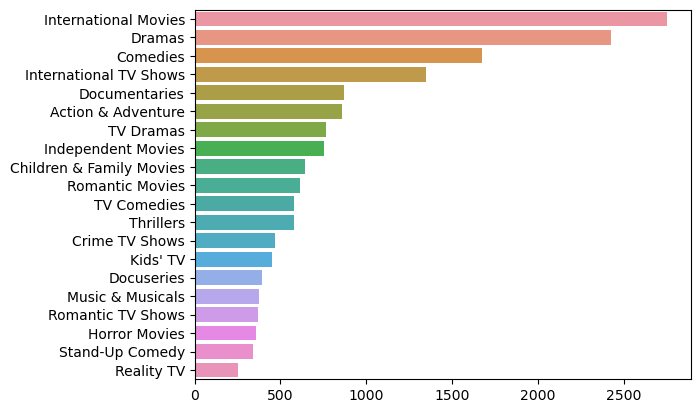

In [31]:
sns.barplot(x=g.value_counts().head(20).values, y=g.value_counts().head(20).index)
plt.show()

In [34]:
R=df[df['rating']=='R']

r=R.country.value_counts()[:15]
r

United States                            451
United Kingdom                            33
United Kingdom, United States             22
Canada                                    16
United States, United Kingdom             15
United States, Canada                     13
Canada, United States                     10
United States, Germany                     7
United States, France                      6
Hong Kong                                  6
United Kingdom, Canada, United States      5
Mexico                                     4
Australia                                  4
Germany                                    4
United States, Mexico                      3
Name: country, dtype: int64

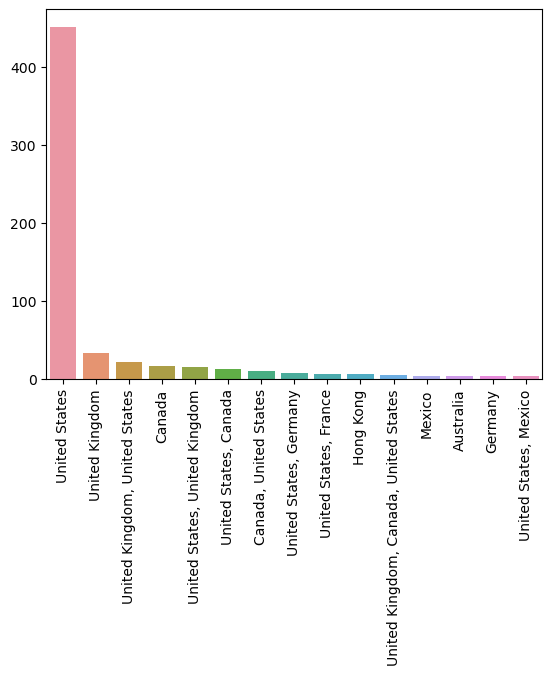

In [35]:
sns.barplot(data=R,x=r.index,y=r.values)
plt.xticks(rotation=90)
plt.show()